# Manipulating Time Series Data in Python

## Table of Contents

- [Introduction](#intro)
- [Working with Time Series in Pandas](#s1)
- [Indexing & resampling time series](#s2)
- [Lags, changes, and returns for stock price series](s#3)

---
<a id='intro'></a>

## Introduction

In this course you'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc27/"

---
<a id='s1'></a>

## Working with Time Series in Pandas

<img src="images/ts2_001.png" alt="" style="width: 400px;"/>

### Your first time series

Create a week of data, iterate over the result, and obtain the `dayofweek` and `weekday_name` for each date.

In [4]:
# Create the range of dates here
# Use pd.date_range to create seven dates starting from '2017-1-1' 
#  at (default) daily frequency. Use the arguments start and periods. 
#  Assign the result to seven_days.
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


---
<a id='s2'></a>

## Indexing & resampling time series

In [35]:
df = pd.read_csv(path+'data.csv')#, index_col='date')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [36]:
data = df
# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [37]:
# Convert the date column to datetime64
pd.to_datetime(data.date)
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [38]:
# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [39]:
# Set date column as index
data.set_index('date', inplace=True)
# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4+ KB
None


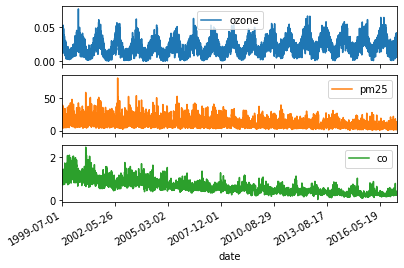

In [40]:
# Plot data
data.plot(subplots=True)
plt.show();

## Compare annual stock price trends

In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [51]:
df = pd.read_csv(path+'yahoo.csv', parse_dates=True, index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [53]:
yahoo = df
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


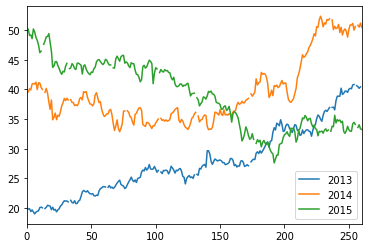

In [54]:
# Plot prices
prices.plot()
plt.show();

## Set and change time series frequency

Use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [55]:
df = pd.read_csv(path+'co.csv', parse_dates=True, index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [57]:
co = df
# Inspect data
print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


In [58]:
# Set the frequency to calendar daily
co = co.asfreq('D')

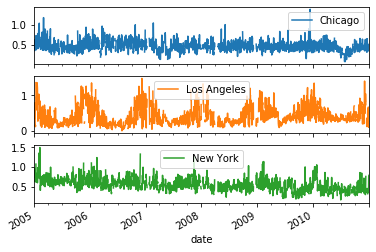

In [59]:
# Plot the data
co.plot(subplots=True)
plt.show();

In [60]:
# Set frequency to monthly
co = co.asfreq('M')

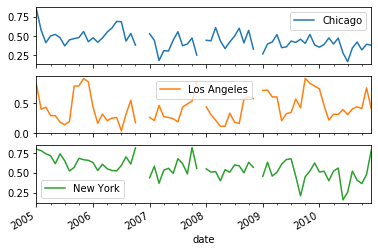

In [61]:
# Plot the data
co.plot(subplots=True)
plt.show();

---
<a id='s3'></a>

## Lags, changes, and returns for stock price series

In [12]:
---
<a id='s4'></a>

SyntaxError: invalid syntax (<ipython-input-12-345b3885c024>, line 1)

In [ ]:
<img src="images/ts2_001.png" alt="" style="width: 400px;"/>